In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import PCA_Transfer 
path = 'default_of_credit_card_clients.csv'
train_x_y = pd.read_csv(path)

feature_list = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3',
                'PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
                'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                'PAY_AMT5','PAY_AMT6']

X = train_x_y[feature_list]
y = train_x_y.default_payment_next_month
#dimensional reduction

num_layer = []
train_store = []
test_store = []
l = []

X = PCA_Transfer.PCA_Transfer(X,2)
print(X)
for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #‘sgd’ refers to stochastic gradient descent.
    #L2 penalty (regularization term) parameter.
    clf = MLPClassifier(solver='adam', alpha=0.0001,max_iter = 200,
                        #i layers  10 units
                        batch_size= 10000,
                        hidden_layer_sizes=(i, 10), random_state=1,learning_rate_init=0.1)

    clf.fit(X_train, y_train)
    y_pred_class = clf.predict(X_test)

    l.append(f1_score(y_test, y_pred_class, average='micro'))
    print("x_train,y_train score:", clf.score(X_train, y_train))
    print("x_test,y_test score:", clf.score(X_test, y_test))
    print("f1_score:", f1_score(y_test, y_pred_class, average='micro'))
    print("number of layers:", i)
    print(metrics.classification_report(y_test, y_pred_class))
    num_layer.append(i)
    train_store.append(clf.score(X_train, y_train))
    test_store.append(clf.score(X_test, y_test))
print("F1 average:",sum(l) / 50)

ModuleNotFoundError: No module named 'PCA_Transfer'

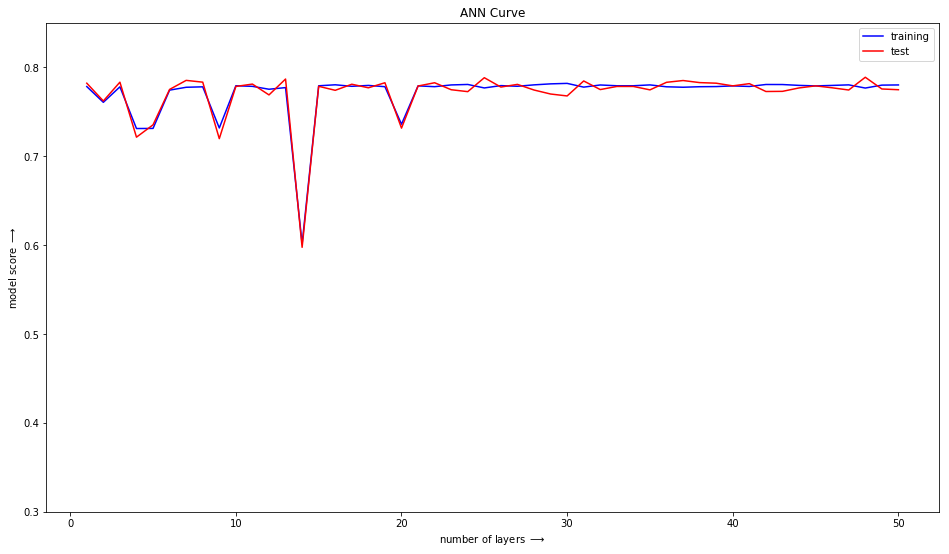

In [25]:
%matplotlib inline
plt.figure(figsize=(16,9))
train, = plt.plot(num_layer,train_store,color='blue',label='training')
test, = plt.plot(num_layer,test_store,color='red',label='test')

plt.legend(handles=[train, test] )

plt.xlabel(r'number of layers $\longrightarrow$')
plt.ylabel(r'model score $\longrightarrow$')
plt.ylim(0.3,0.85)
plt.title("ANN Curve", size=12)
